<a href="https://colab.research.google.com/github/kavikushi0228/Image-processing-assignment-2/blob/main/IP_AS2_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

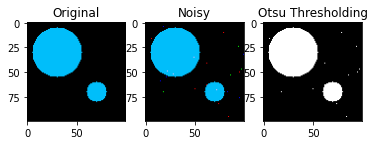

True

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from PIL import Image

# create the image with two circles as before
img = np.zeros((100, 100, 3), dtype=np.uint8)
bg_color = (0, 0, 0)
circle_color = (250, 190, 0)
radius1 = 25
radius2 = 10
center1 = (30, 30)
center2 = (70, 70)
for i in range(100):
    for j in range(100):
        if ((i - center1[0])**2 + (j - center1[1])**2) <= radius1**2:
            img[i, j] = circle_color
        elif ((i - center2[0])**2 + (j - center2[1])**2) <= radius2**2:
            img[i, j] = circle_color
        else:
            img[i, j] = bg_color

# add Gaussian noise to the image
mean = 0
variance = 0.1
sigma = np.sqrt(variance)
noise = np.random.normal(mean, sigma, img.shape).astype(np.uint8)
noisy_img = cv2.add(img, noise)

# convert the image to grayscale
gray_img = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)

# apply Otsu's thresholding algorithm
threshold, otsu_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# plot the original, noisy, and thresholded images
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
plt.title('Noisy')
plt.subplot(1, 3, 3)
plt.imshow(otsu_img, cmap='gray')
plt.title('Otsu Thresholding')
plt.show()

cv2.imwrite('generatedImage.png', img)